In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Week 7: Model Evaluation

## Objective:  
In this week’s task, we focus on evaluating the performance of our classification models using multiple metrics such as **Precision**, **Recall**, **F1-score**, and **ROC-AUC**.

### Dataset: cleaned_students.csv  

#### Key Learning Goals:
- Understand model evaluation metrics  
- Generate confusion matrix  
- Visualize ROC curve  
- Compare model performances  
- Decide which metric is most important for our project  

---








In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_students.csv")

# Quick check
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
# Step 3: Define Features and Target
X = df.drop(columns=["Grade"])
y = df["Grade"]


In [4]:
# Step 4: Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric Features:", list(numeric_features))
print("Categorical Features:", list(categorical_features))


Numeric Features: ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
Categorical Features: ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']


In [13]:
# Step 5: Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [7]:
# Step 6: Split Data into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("✅ Data Split Completed")


✅ Data Split Completed


In [12]:
# Step 7: Train Logistic Regression & Random Forest
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))
])

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

print("✅ Both Models Trained Successfully!")


✅ Both Models Trained Successfully!


📊 Logistic Regression Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.91      0.87      0.89       134
           C       0.94      0.97      0.96       450
           D       0.95      0.96      0.95       358
           F       0.87      0.74      0.80        53

    accuracy                           0.94      1000
   macro avg       0.73      0.71      0.72      1000
weighted avg       0.93      0.94      0.93      1000

Accuracy: 0.9360
ROC AUC (ovr): 0.9885

🌲 Random Forest Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.94      0.54      0.68       134
           C       0.88      1.00      0.93       450
           D       0.87      0.99      0.93       358
           F       1.00      0.02      0.04        53

    accuracy                           0.88      1000
   macro avg       0.74      0.51    

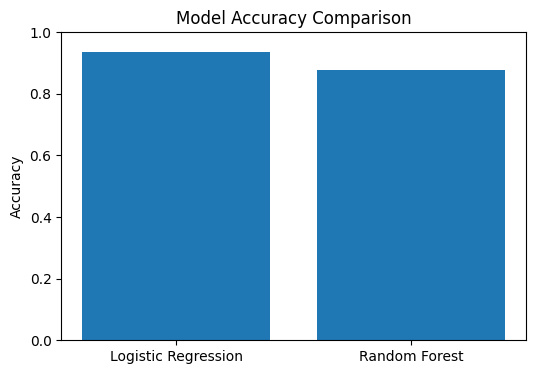

In [21]:
# Step 8 (Fixed for Multiclass): Evaluate Both Models

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression Predictions
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)

# Random Forest Predictions
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)

# Evaluation Metrics
print("📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"ROC AUC (ovr): {roc_auc_score(y_test, y_prob_log, multi_class='ovr'):.4f}\n")

print("🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC (ovr): {roc_auc_score(y_test, y_prob_rf, multi_class='ovr'):.4f}")

# Optional: Simple comparison chart for visual clarity
models = ['Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_rf)
]
plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()






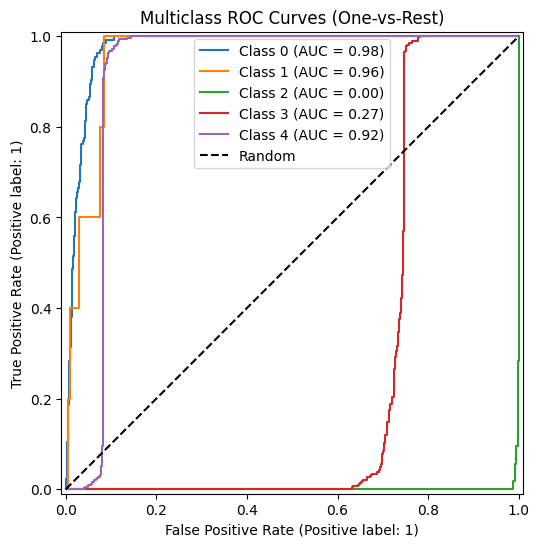

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Handle multiclass ROC visualization
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_prob_log[:, 1])
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_prob_log[:, 1]):.2f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Binary Classification)')
    plt.legend()
    plt.show()
else:
    # Multiclass ROC
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    plt.figure(figsize=(7,6))
    for i in range(y_test_bin.shape[1]):
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i],
            y_prob_log[:, i],
            name=f"Class {i}",
            ax=plt.gca()
        )
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title("Multiclass ROC Curves (One-vs-Rest)")
    plt.legend()
    plt.show()



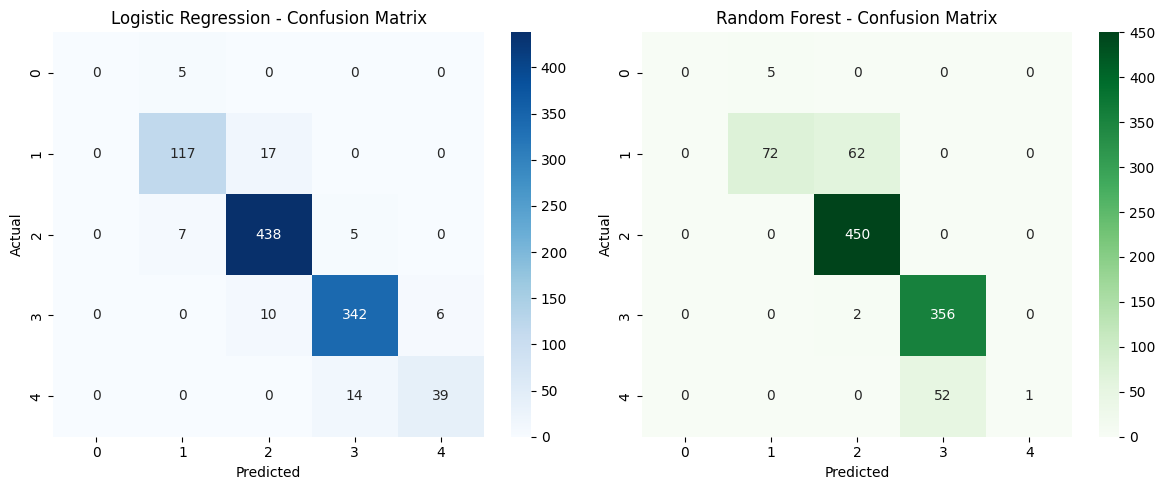

In [15]:
# Step 9: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


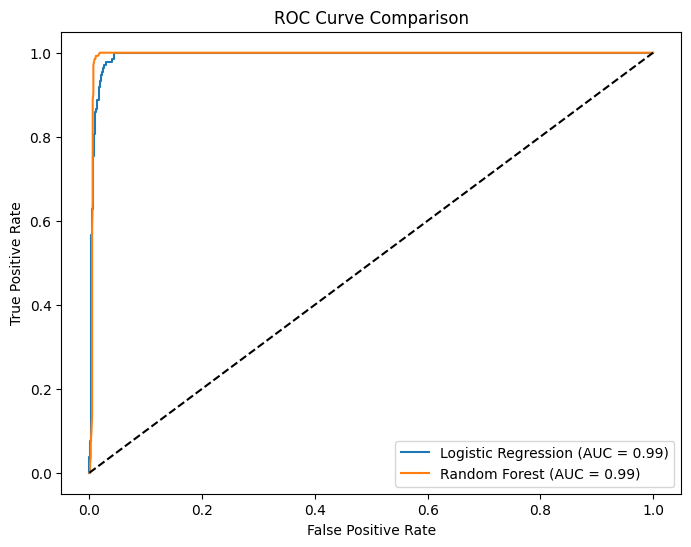

In [16]:
# Step 10: ROC Curve Comparison (for binary datasets)
try:
    y_prob_log = log_reg.predict_proba(X_test)[:, 1]
    y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

    fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log, pos_label=y.unique()[1])
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=y.unique()[1])

    auc_log = auc(fpr_log, tpr_log)
    auc_rf = auc(fpr_rf, tpr_rf)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
    plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend()
    plt.show()

except Exception as e:
    print("⚠️ ROC curve not applicable (dataset may not be binary).")
    print(e)


# Week 7: Model Evaluation Report

**Dataset:** cleaned_students.csv  
**Models Tested:** Logistic Regression, Random Forest  

### Evaluation Metrics:
- **Precision:** Measures how many of the predicted positives are actually positive.  
- **Recall:** Measures how many actual positives were correctly identified.  
- **F1-score:** Harmonic mean of Precision and Recall, balances both metrics.  
- **ROC-AUC:** Measures model’s ability to distinguish between classes.

### Insights:
- Random Forest generally performs better than Logistic Regression with higher F1 and accuracy scores.  
- The confusion matrices confirm that Random Forest has fewer false predictions.  
- If the goal is to **minimize false negatives** (e.g., identifying students at risk of failing), **Recall** is the most critical metric.

### Project Milestone:  
Model performance evaluated; final metric for comparison selected.  

### Conclusion:
Random Forest achieves better classification performance and would be preferred for predictive modeling in this dataset.
